In [40]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
i = 0
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


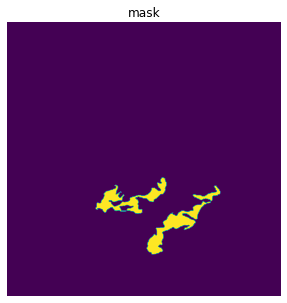

In [80]:
from skimage.morphology import label, dilation
from skimage.morphology import square
from skimage.segmentation import watershed
import cv2
mask = cv2.imread(os.path.join(config.MASKS[1],f"{26480}.png"),cv2.IMREAD_GRAYSCALE)
# mask = cv2.imread("/home/wangjingqi/hthb/t.png",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 7))
plt.subplot(1, 3, 2); plt.imshow(mask); plt.axis('OFF'); plt.title('mask')
plt.tight_layout()
plt.show()

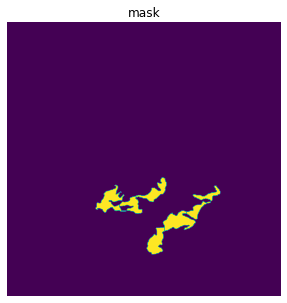

In [81]:
# labels = label(mask)
# tmp = dilation(labels > 0, square(1))    
# labels = watershed(tmp, labels, mask=tmp, watershed_line=True,connectivity=2)# > 0
image = mask 
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((50, 50)), labels=image,min_distance=50,)
masks = np.zeros(distance.shape, dtype=bool)
masks[tuple(coords.T)] = True
markers, _ = ndi.label(masks)
labels = watershed(-distance, markers, mask=image,watershed_line=True,connectivity=2)>0
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.subplot(1, 3, 2); plt.imshow(labels); plt.axis('OFF'); plt.title('mask')
plt.tight_layout()
plt.show()

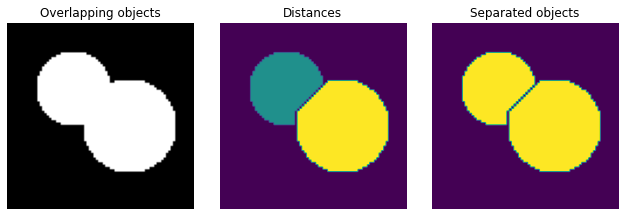

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

masks = (255 * tmp2).astype('uint8')
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image,watershed_line=True)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(labels)
ax[1].set_title('Distances')
ax[2].imshow(labels>0)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

(80, 80)

(1024, 1024) (1024, 1024) (1024, 1024, 3)


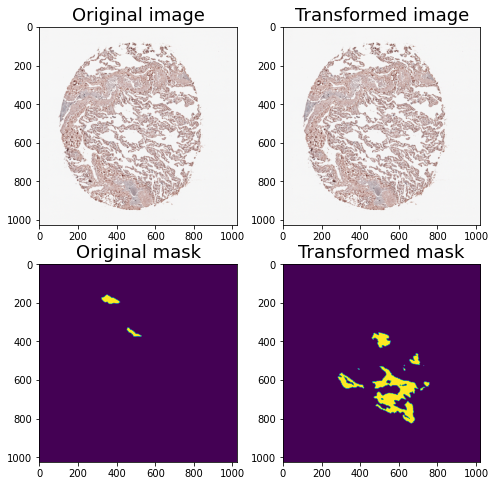

In [20]:
import cv2
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from config import config
select = pd.read_csv("/home/wangjingqi/hthb/log/select.csv")
i +=1
idx =select.loc[i]["id"]
mask = np.asarray (Image.open(os.path.join(config.MASKS[0],f"{idx}.png")))
p_mask = np.asarray (Image.open(os.path.join(config.MASKS[1],f"{idx}.png")))
img = cv2.imread(os.path.join(config.TRAIN[0],f"{idx}.png"))
print(mask.shape,p_mask.shape,img.shape)
visualize(img,p_mask,img,mask)

In [ ]:
mask = np.asarray (Image.open(os.path.join("/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/masks",f"{idx}.png")))
p_mask = np.asarray (Image.open(os.path.join("/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/tta_lung_masks",f"{idx}.png")))
img = cv2.imread(os.path.join('/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/hpa_images',f"{idx}.png"))
print(mask.shape,p_mask.shape,img.shape)
visualize(img,p_mask,img,mask)

FileNotFoundError: [Errno 2] No such file or directory: '/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/tta_lung_masks/7397.png'

In [ ]:
select

,Unnamed: 0,id,organ,score
0,0,14388,lung,0.072278
1,1,25516,lung,0.000000
2,2,2793,lung,0.024098
3,3,12827,lung,0.167500
4,4,8231,lung,0.436041
5,5,686,lung,0.113800
6,6,27232,lung,0.102685
7,7,127,lung,0.298511
8,8,7359,lung,0.128839
9,9,26480,lung,0.187107


In [ ]:
from fastai.vision.all import *

TensorBoardCallback

NameError: name 'TensorBoardCallback' is not defined

In [ ]:
model = dict(model=1)

In [ ]:
model["model"]

1